# <center> <b> LOAN APPROVAL ANALYSIS<br>

<b> <span style="color: #008B8B; font-size: 1.5em;"> TABLE OF CONTENTS
    
* [1. OVERVIEW.](#1)
    * [1.1. About the dataset.](#1.1.)
* [2. EXPLORATORY DATA ANALYSIS.](#2)
    * [2.1. General.](#2.1.)
    * [2.2. Loan Visualization.](#2.2)
    * [2.3. Univariate Analysis.](#2.3)
    * [2.4. Bivariate Analysis.](#2.4)
    * [2.5. Multivariate Analysis.](#2.5)
* [3. MODEL DEVELOPMENT.](#3)
    * [3.1. Preprocessing.](#3.1)
    * [3.2. Model Building.](#3.2)
* [CONCLUSION.](#4)

# Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import annotations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# `1. OVERVIEW.` <a class="anchor" id="1"></a>

### `1.1. About the dataset.` <a id="1.1."></a>

#### Problem Statement:
About Company:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.
####Problem
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.
#### Steps to Follow:
Problem Statement
*   Hypothesis Generation
*   Getting the system ready and loading the data
*   Understanding the data
*   EDA
*   Perform Univariate Analysis
*   Perform Bivariate and Multivariate Analysis
*   Missing value and outlier treatment
*   Model building: Apply ML classification algorithms
*   Evaluation Metrics for classification problem



#### Dataset Description:

| Variable | Description |
|------|------|
| Loan_ID | Unique Loan ID |
| Gender | Male/ Female |
| Married | Applicant married (Y/N) |
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed | Self employed (Y/N) |
| ApplicantIncome | Applicant income |
| CoapplicantIncome | Coapplicant income |
| LoanAmount | Loan amount in thousands |
| Loan_Amount_Term | Term of loan in months |
| Credit_History | credit history meets guidelines |
| Property_Area | Urban/ Semi Urban/ Rural |
| Loan_Status | Loan approved (Y/N) |

### First look at the data

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Portfolio_Vu Tien Hai/Loan Approval Prediction/loan_sanction_train.csv")

In [ ]:
data.shape

(614, 13)

- The raw data contains <b> 614 rows </b> (customers) and <b> 13 columns </b> (features).

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## `2. EXPLORATORY DATA ANALYSIS.` <a class="anchor" id="2"></a>

### `2.1. General.` <a id="2.1"></a>

#### Data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull().sum().to_frame().T

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,13,3,15,0,32,0,0,22,14,50,0,0


**Clearly, there are missing values in the data.**

In [ ]:
data.duplicated().any()

False

**There are no duplicate rows.**

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### <u>Comment</u>:
- **Mean income of the applicant : 5403.46**
- **Mean income of the Co Applicant : 1621.25**
- **Mean of Loan amount : 146.41**
- **Mean Term of loan : 342**

In [ ]:
data.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
data = data.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [ ]:
def conditions(data):
    if (data['Loan_Status'] == 'Y'):
        return True
    elif(data['Loan_Status'] == 'N'):
        return False
data['Loan_Status'] = data.apply(conditions, axis = 1)

### `2.2. Loan_Status Visualization.` <a id="2.2"></a>

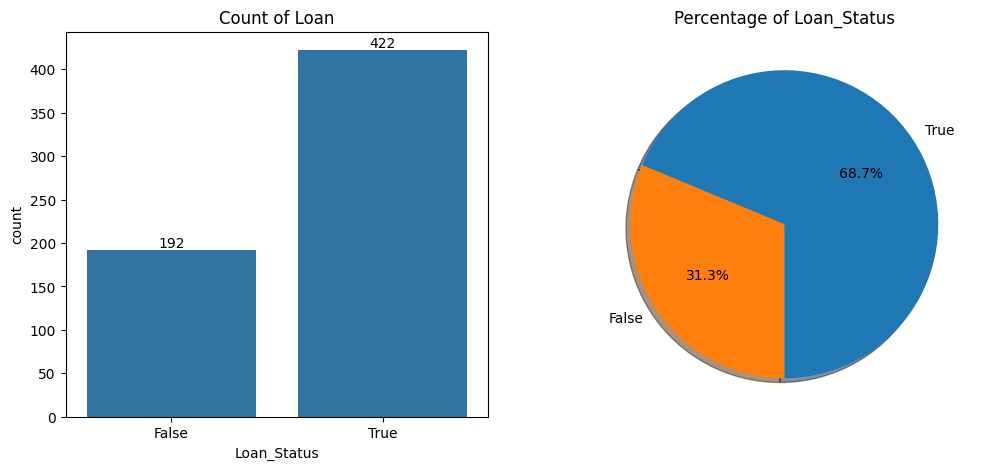

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='Loan_Status',data=data)
ax1.bar_label(ax1.containers[0])
plt.title("Count of Loan")
plt.subplot(1,2,2)
labels =data['Loan_Status'].value_counts(sort = True).index
sizes = data['Loan_Status'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Loan_Status',size = 12)
plt.show()

#### <u>Comment</u>:
The number of clients who have been approved to the loan is 422 with a percentage of 68.7%% and the number of clients who have not been approved is 192 with a percentage of 31.3%.

### `2.3 Univariate analysis` <a id="2.3"></a>



#### `2.3.1 Numerical Columns`

`ApplicantIncome`

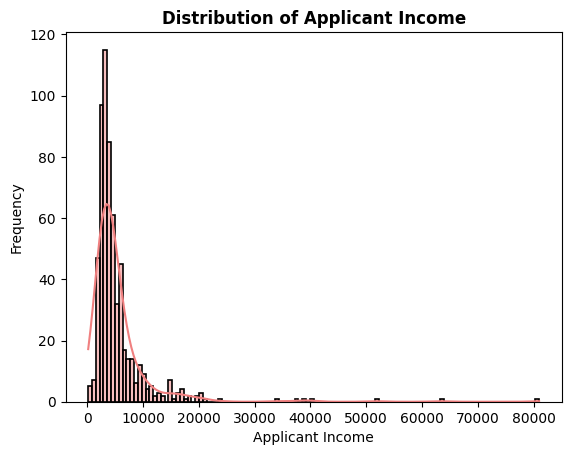

In [ ]:
# Plotting the histogram
sns.histplot(data=data, x="ApplicantIncome", kde=True, edgecolor="black", linewidth=1.2,color='lightcoral')

# Customizing the plot
plt.title("Distribution of Applicant Income", weight="bold")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")

# Display the plot
plt.show()

<h4 style = "text-align:center; font-size:110%">Based on the provided histogram plot, it is evident that there are outliers in the data, as there are a few data points that deviate significantly from the majority of the values. Most of the income values range from 150 to 10000.</h4>

In [ ]:
data["ApplicantIncome"].agg(["min", "max"])

min      150
max    81000
Name: ApplicantIncome, dtype: int64

`CoapplicantIncome`

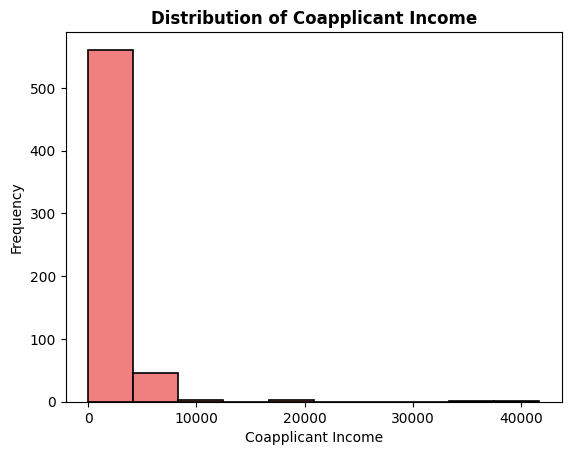

In [ ]:
plt.hist(x=data["CoapplicantIncome"], edgecolor="black", linewidth=1.2,color='lightcoral')

plt.title("Distribution of Coapplicant Income", weight="bold")
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")

plt.show()

<h4 style = "text-align:center; font-size:110%">Most of the coapplicant income values range from 0 to 3000. Additionally, it is evident that there are also outliers present in the data.</h4>

`LoanAmount`

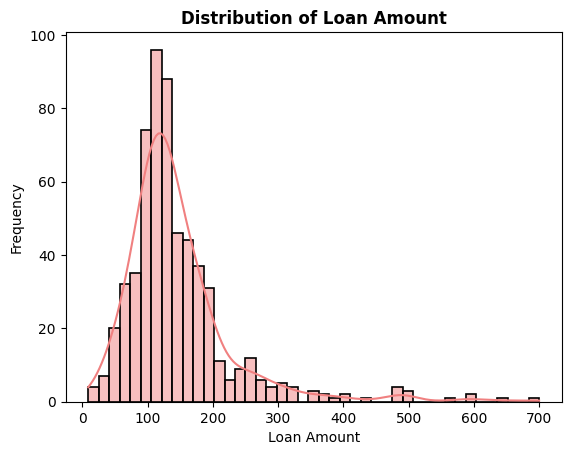

In [ ]:
sns.histplot(data=data, x="LoanAmount", kde=True, edgecolor="black", linewidth=1.2,color='lightcoral')

plt.title("Distribution of Loan Amount", weight="bold")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

plt.show()

<h4 style = "text-align:center; font-size:110%">Most of the loan amount values range from 9 to 200. This can be observed from the histogram plot.</h4>

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


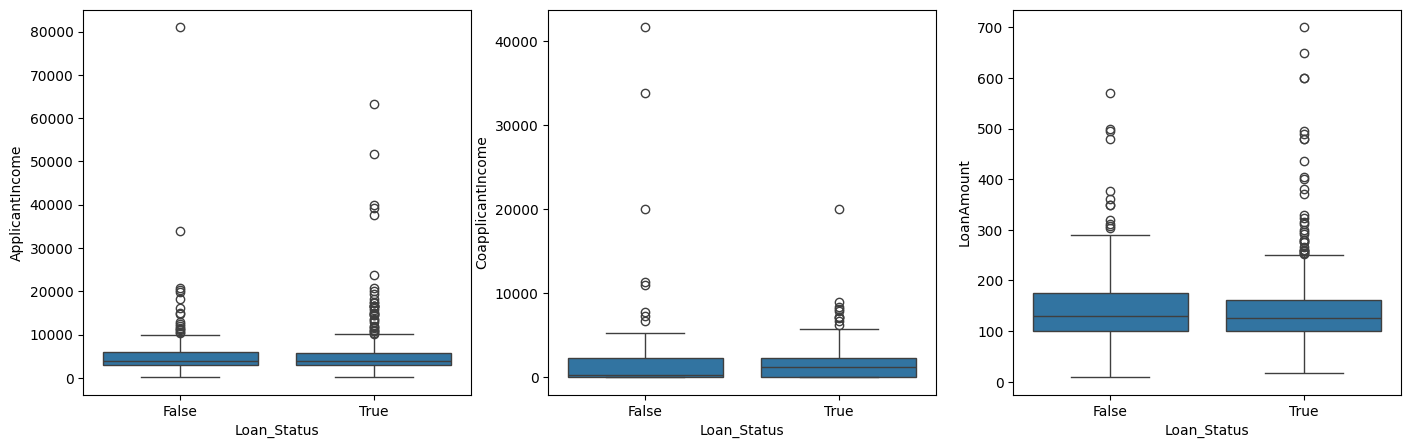

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

###Numerical Independent Variable vs Target Variable###

In [ ]:
def kdeplot(param,x_title):
  sns.set_context("paper", font_scale=1.1)
  ax = sns.kdeplot(param[(data["Loan_Status"]==False)],
                   color='Red', fill= True);
  ax = sns.kdeplot(param[(data['Loan_Status']==True)],
                   color='Blue', fill= True);
  ax.legend(["Not approved","approved"],loc='upper right');
  ax.set_ylabel('Density');
  ax.set_xlabel(x_title);
  ax.set_title("Distribution of "+ x_title +" by loan approval status");

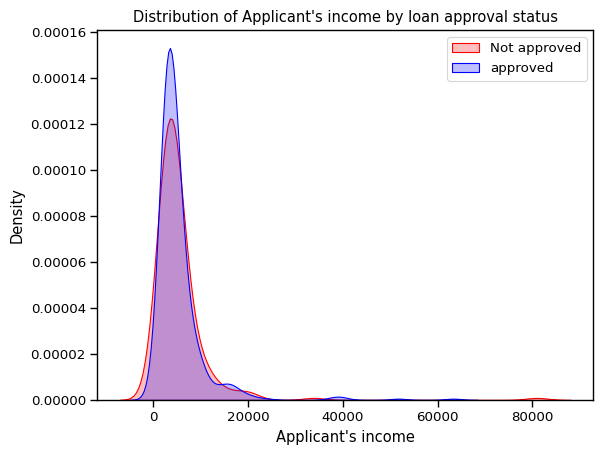

In [ ]:
kdeplot(data.ApplicantIncome,"Applicant's income")

The higher density of approved loans at lower income levels could indicate a higher approval rate for lower-income applicants, potentially due to factors such as loan amounts requested or other approval criteria.


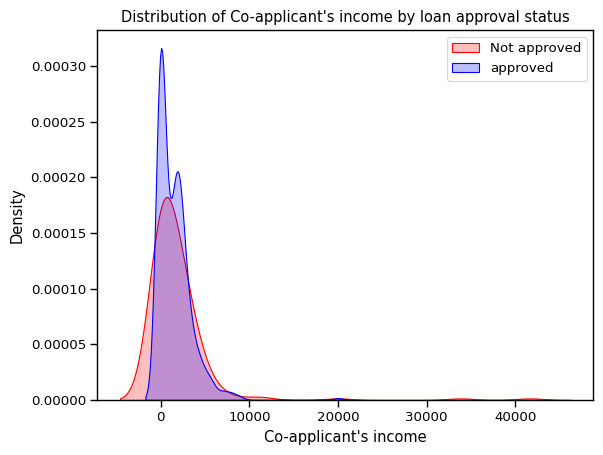

In [ ]:
kdeplot(data.CoapplicantIncome,"Co-applicant's income")

The higher peak for approved loans at low income levels indicates that co-applicants with lower incomes are still getting their loans approved, but the slightly higher income co-applicants have a better approval rate.

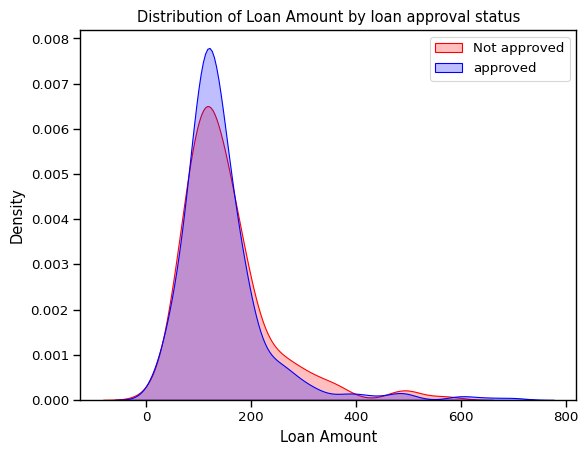

In [ ]:
kdeplot(data.LoanAmount,"Loan Amount")

The higher density and peak at lower loan amounts for approved loans indicate that smaller loan amounts have a higher approval rate.



#### `2.3.2  Categorical Columns`

In [ ]:
def percentsum(feature):
    des = data.groupby([feature])['Loan_Status'].agg(['count', 'sum', 'mean'])
    des = des.rename(columns = {'count':'TotalApplicants', 'sum':'ApprovedQuantity', 'mean':'Ratio'}).sort_values(by='Ratio',ascending=False)
    return des

`Gender`

In [ ]:
fig = px.histogram(data, x="Gender", color="Loan_Status", barmode="group", title="<b>Loan Approval based on Gender<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
percentsum('Gender')

,TotalApplicants,ApprovedQuantity,Ratio
Gender,,,
Male,489,339,0.693252
Female,112,75,0.669643


- From the above graph, it can be observed that the majority of the applicants are males
- There is no clear relationship between gender and loan status approval. However, the proportion of men whose loan applications are approved is higher (69%) compared to women (66%).

`Married`

In [ ]:
fig = px.histogram(data, x="Married", color="Loan_Status", barmode="group", title="<b>Loan Approval based on Marital Status<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
percentsum('Married')

,TotalApplicants,ApprovedQuantity,Ratio
Married,,,
Yes,398,285,0.716080
No,213,134,0.629108


**The percentage of single people whose loans are rejected is higher than the percentage of married people.**

`Dependents`

In [ ]:
fig = px.histogram(data, x="Dependents", color="Loan_Status", barmode="group", title="<b>Loan Approval based on Dependents<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
percentsum('Dependents')

,TotalApplicants,ApprovedQuantity,Ratio
Dependents,,,
2,101,76,0.752475
0,345,238,0.689855
1,102,66,0.647059
3+,51,33,0.647059


- **For most loan applicants, the number of dependents is 0.**
- **The highest percentage of approved loans are for customers with 2 dependents.**

`Education`

In [ ]:
fig = px.histogram(data, x="Education", color="Loan_Status", barmode="group", title="<b>Loan Approval based on Education<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
percentsum('Education')

,TotalApplicants,ApprovedQuantity,Ratio
Education,,,
Graduate,480,340,0.708333
Not Graduate,134,82,0.611940


- **Most of loan applicants graduated.**
- **The percentage of approved loans are for customers who graduated is higher than who do not graduated.**

`Self Employed`

In [ ]:
fig = px.histogram(data, x="Self_Employed", color="Loan_Status", barmode="group", title="<b>Loan Approval based on Self employment<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
percentsum('Self_Employed')

,TotalApplicants,ApprovedQuantity,Ratio
Self_Employed,,,
No,500,343,0.686000
Yes,82,56,0.682927


- **Most loan applicants are not self-employed.**
- **There are no differences of the approved ratio between who are self-employed and who are not.**

`Loan Amount Term`

In [ ]:
fig = px.histogram(data, x="Loan_Amount_Term", color="Loan_Status", barmode="group", title="<b>Loan Approval based on Loan Amount Term<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
percentsum('Loan_Amount_Term')

,TotalApplicants,ApprovedQuantity,Ratio
Loan_Amount_Term,,,
12.0,1,1,1.000000
60.0,2,2,1.000000
120.0,3,3,1.000000
84.0,4,3,0.750000
240.0,4,3,0.750000
360.0,512,359,0.701172
180.0,44,29,0.659091
300.0,13,8,0.615385
480.0,15,6,0.400000


**Majority of the loans taken are for 360 Months (30 years)**

In [ ]:
fig = px.histogram(data, x="Credit_History", color="Loan_Status", barmode="group", title="<b>Loan Approval based on Credit History<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
percentsum('Credit_History')

,TotalApplicants,ApprovedQuantity,Ratio
Credit_History,,,
1.0,475,378,0.795789
0.0,89,7,0.078652


**Mostly, anyone with a credit history of 1 (Yes) will be accepted**

`Property Area`

In [ ]:
fig = px.histogram(data, x="Property_Area", color="Loan_Status", barmode="group", title="<b>Loan Approval based on Property Area<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
percentsum('Property_Area')

,TotalApplicants,ApprovedQuantity,Ratio
Property_Area,,,
Semiurban,233,179,0.768240
Urban,202,133,0.658416
Rural,179,110,0.614525


- **Most of the loan applicants are from semi-urban areas.**
- **Semi-urban area also has the most approved applicants**


### `2.4 Bivariate analysis` <a id="2.4"></a>



#### `1. Is there a relationship between the applicant's income and loan amount requested?`

In [ ]:
## ApplicantIncome and LoanAmount
print(f'the Correlation between the Applicant Income and LoanAmount is \
      {round(data[["ApplicantIncome" ,"LoanAmount"]].corr(),2).iloc[0,1]}')

the Correlation between the Applicant Income and LoanAmount is       0.57


**There is a strong relationship between the applicant's income and the loan amount requested.**

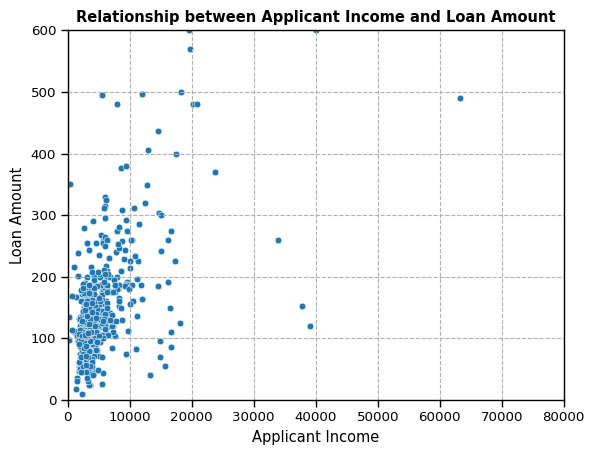

In [ ]:
## Create a scatter plot
sns.scatterplot(data=data, x="ApplicantIncome", y="LoanAmount")

## labels and title
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Relationship between Applicant Income and Loan Amount", weight="bold")

## style settings
plt.grid(True, linestyle="--")  # Add grid lines
plt.xlim(0, 80000)  # Set the x-axis limits
plt.ylim(0, 600)  # Set the y-axis limits

## Show the plot
plt.show()

#### `2.  Does the loan amount vary based on the applicant's property area?`

In [ ]:
data.groupby("Property_Area")["LoanAmount"].agg(["sum","mean","count"]).sort_values(by="mean", ascending=False)

,sum,mean,count
Property_Area,,,
Rural,26341.0,152.260116,173
Semiurban,33175.0,145.504386,228
Urban,27160.0,142.198953,191


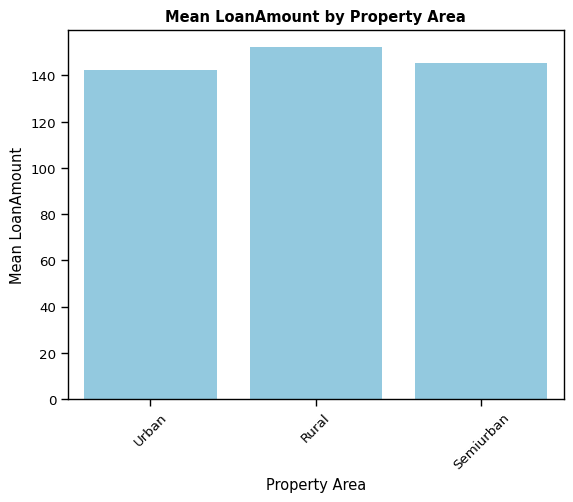

In [ ]:
# Create the bar plot
sns.barplot(data=data, x="Property_Area", y="LoanAmount", errorbar=None, estimator="mean",color="skyblue")

# Customize the plot
plt.title("Mean LoanAmount by Property Area", weight="bold")
plt.xlabel("Property Area")
plt.ylabel("Mean LoanAmount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

**The average Loan Amount in the "Rural" area is higher than in the other areas.**

#### `3. Is there a correlation between the loan amount and the applicant's loan repayment term?`

Correlation between Loan Amount and Loan Amount Term = 0.04


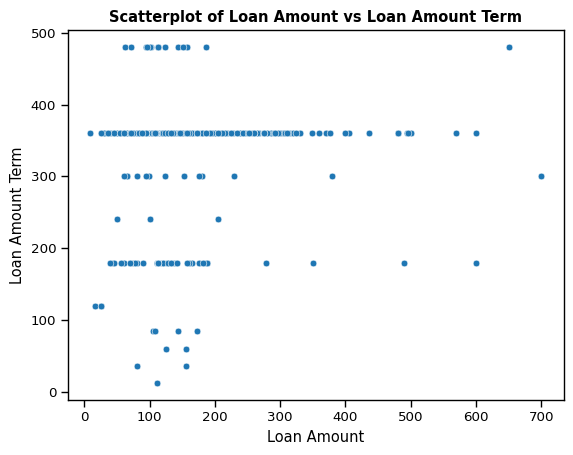

In [ ]:
# Calculate the correlation between 'LoanAmount' and 'Loan_Amount_Term'
correlation = data[["LoanAmount", "Loan_Amount_Term"]].corr().iloc[0, 1]

# Print the correlation value
print("Correlation between Loan Amount and Loan Amount Term = {:.2f}".format(correlation))

# Create a scatterplot
sns.scatterplot(data=data, x="LoanAmount", y="Loan_Amount_Term")

# Set plot labels and title
plt.xlabel("Loan Amount")
plt.ylabel("Loan Amount Term")
plt.title("Scatterplot of Loan Amount vs Loan Amount Term", weight="bold")

# Show the plot
plt.show()

**There is no relationship between the loan amount and the number of repayment months**

### `2.5 Multivariate analysis` <a id="2.5"></a>



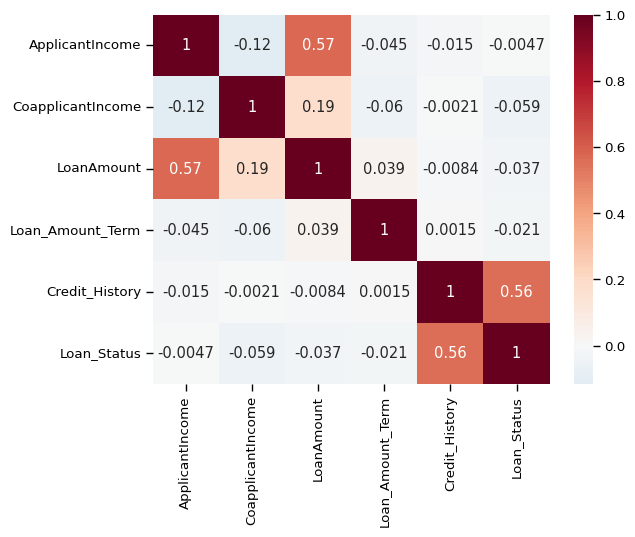

In [ ]:
Numerical_cols = data.select_dtypes(include="number").columns.to_list() ## Numerical Features in the data

## Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

## Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", center=0)

plt.show()

**Business Insights:**
- Most of the income values range from 150 to 10000. There is higher approval rate for lower-income applicants
- Most of the coapplicant income values range from 0 to 3000, co-applicants with lower incomes are still getting their loans approved
- Most of the loan amount values range from 9 to 200. There are smaller loan amounts have a higher approval rate.
- The approved applicants likely are males, having 2 dependents, graduated, having 10-years term, especially meeting the credit history guildlines, and from semi-urban area.
- The higher applicants' income is, the higher loan amount they are requested.


## 3. Model Development <a class="anchor" id="3"></a>

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline, Pipeline
from imblearn.under_sampling import NearMiss

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

### 3.1. Preprocessing Data. <a id="3.1"></a>

In [ ]:
## Copy
df = data.copy()

In [ ]:
# Encoding categrical Features: #
data_encoded = pd.get_dummies(df,drop_first=True)
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,True,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,True,True,False,False,False,False,False,False,False,True


In [ ]:
# Split Features and Target Varible #
X = data_encoded.drop(columns='Loan_Status')
y = data_encoded['Loan_Status']

# Splitting into Train -Test Data #
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
# Handling/Imputing Missing values #
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

### 3.2. Model Building. <a id="3.2"></a>

The target value is "Loan_Status", a "Yes/No" variable. Therefore, Classification predictive models or Binary Classification Algorithms are suitable for developing the models.<br>
In this report, the authors decided to use some popular models, which are:
- Logistic Regression.
- Decision Trees.
- Random Forest.
- Extreme Gradient Boosting.

In [ ]:
def metrics_scoring_table(y_model,y_true, model_name):
    prec = precision_score(y_true, y_model)
    accu = accuracy_score( y_true, y_model)
    recall = recall_score(y_true, y_model)
    f1 = f1_score(y_true, y_model)
    df_score = pd.DataFrame(data= {
    "model" :  model_name,
    "accuracy score": accu,
    "precision score": prec,
    "recall score": recall,
    "f1-score": f1
    },
    index = [0]
    )
    return df_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6535301281042771
Validation Mean Accuracy:  0.7066996495567924


#### Overfitting Problem
We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

#### First let's try tuning 'Max_Depth' of tree


<Axes: xlabel='Max_Depth', ylabel='Values'>

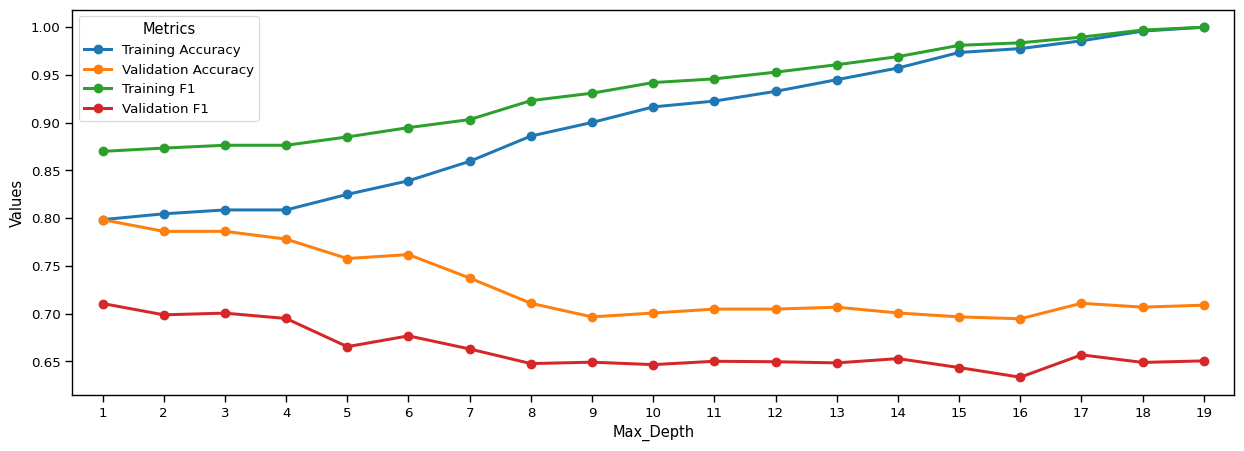

In [ ]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)


Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)


From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score
Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7
#### Visulazing Decision Tree with Max Depth = 3

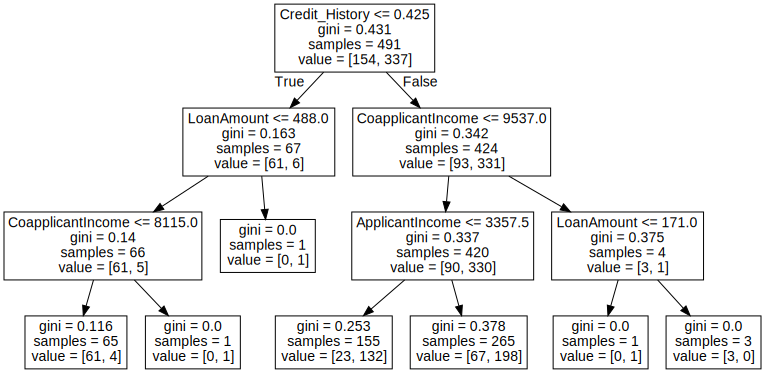

In [ ]:
import graphviz
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit.
We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

<Axes: xlabel='Min_Samples_leaf', ylabel='Values'>

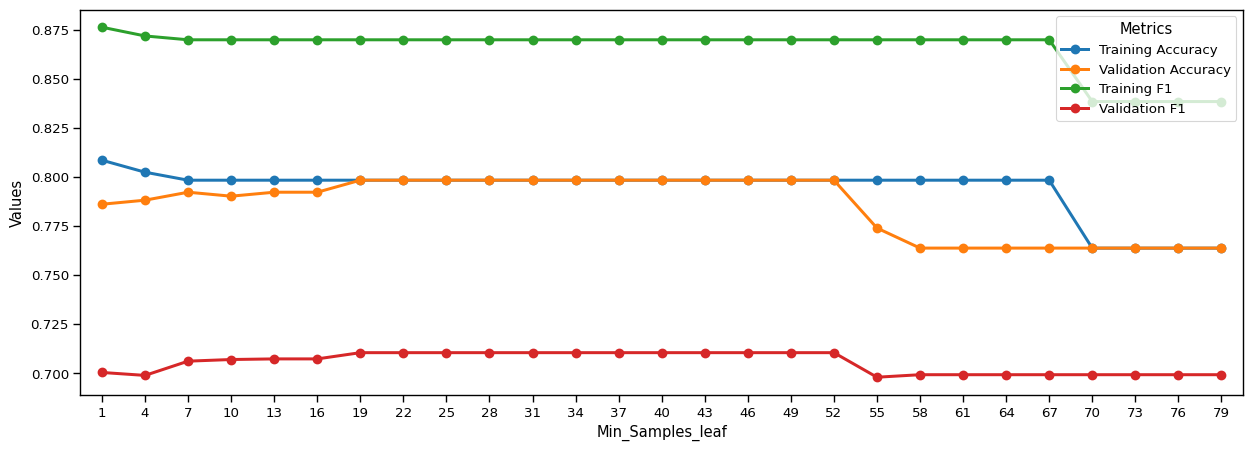

In [ ]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)


Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

Let's use this Decision Tree classifier on unseen test data and evaluate __Test Accuracy, F1 Score and Confusion Matrix__

In [ ]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
dt_Y_pred = tree_clf.predict(X_test_imp)

metrics_scoring_table(dt_Y_pred,y_test,"Decision Tree")

,model,accuracy score,precision score,recall score,f1-score
0,Decision Tree,0.853659,0.831683,0.988235,0.903226


In [ ]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, dt_Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,False,True,All
True,,,
False,21,17,38
True,1,84,85
All,22,101,123


####  Mis-classifications
It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

### Model 2: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred= rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.7049129973894145
Validation Mean Accuracy:  0.7983714698000413


#### Random Forest: Test Data Evaluation

In [ ]:
rf_Y_pred = rf_clf.predict(X_test_imp)

metrics_scoring_table(rf_Y_pred,y_test,"Random Forest")

,model,accuracy score,precision score,recall score,f1-score
0,Random Forest,0.853659,0.831683,0.988235,0.903226


In [ ]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, rf_Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,False,True,All
True,,,
False,21,17,38
True,1,84,85
All,22,101,123


Random Forest gives same results as Decision Tree Classifier.
Finally, we will try Logistic Regression Model by sweeping threshold values.

### Model 3: Logistic Regression

<Axes: xlabel='Decision Threshold', ylabel='Values'>

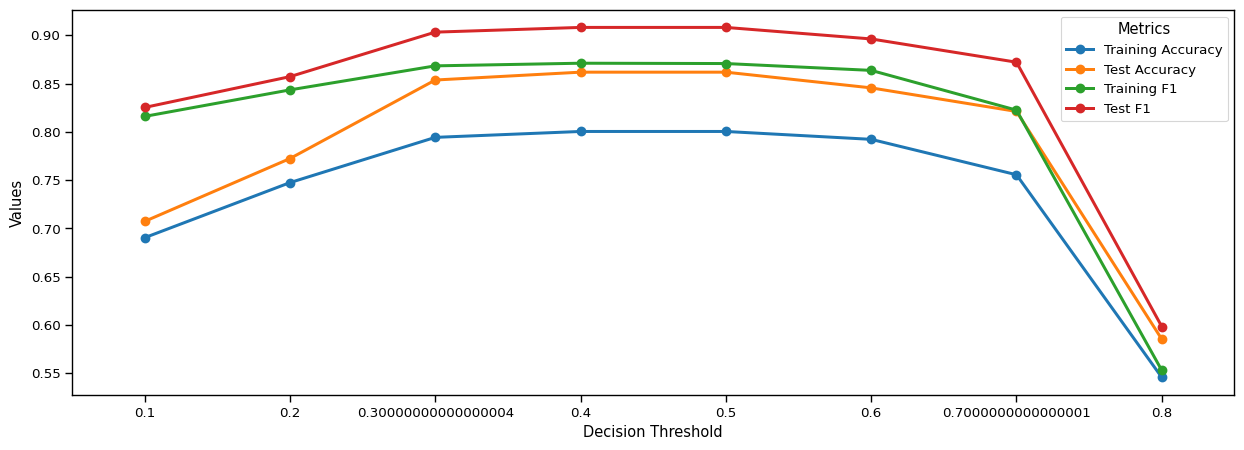

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)

    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)

    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)

    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)

    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)


Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Logistic Regression does slightly better than Decision Tree and Random Forest.
<br> Based on the above Test/Train curves, we can keep threshold to 0.4. <br>
Now Finally let's look at Logistic Regression Confusion Matrix

In [ ]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
logr_Y_pred = (y_pred_test_thresh > thresh).astype(int)

metrics_scoring_table(logr_Y_pred,y_test,"Logistic Regression")

,model,accuracy score,precision score,recall score,f1-score
0,Logistic Regression,0.861789,0.84,0.988235,0.908108


Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier.
In this analysis, we did extensive analysis of input data and were able to achieve Test Accuracy of  __86 %__



In [ ]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, logr_Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
False,22,16,38
True,1,84,85
All,23,100,123


### Model 4: XGBoost Classifier

In [ ]:
xgb_model = XGBClassifier()
# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
XGB_Y_pred = xgb_model.predict(X_test)

metrics_scoring_table(XGB_Y_pred,y_test,"XGBoost")

,model,accuracy score,precision score,recall score,f1-score
0,XGBoost,0.780488,0.837209,0.847059,0.842105


In [ ]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, XGB_Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
False,24,14,38
True,13,72,85
All,37,86,123


###Model Evaluation

In [ ]:
score_1 = metrics_scoring_table(logr_Y_pred,y_test,"LogisticRegression")
score_2 = metrics_scoring_table(dt_Y_pred,y_test ,"Decision Tree")
score_3 = metrics_scoring_table(rf_Y_pred,y_test ,"RandomForest")
score_4 = metrics_scoring_table(XGB_Y_pred,y_test ,"XGBClassifier")
score = pd.concat([score_1,score_2,score_3,score_4], axis=0)
score

,model,accuracy score,precision score,recall score,f1-score
0,LogisticRegression,0.861789,0.840000,0.988235,0.908108
0,Decision Tree,0.853659,0.831683,0.988235,0.903226
0,RandomForest,0.853659,0.831683,0.988235,0.903226
0,XGBClassifier,0.780488,0.837209,0.847059,0.842105


#CONCLUSION <a class="anchor" id="4"></a>
We will use Logistic Regression for Classification Loan_Status with highest f1-score (**90.8%**) and accuracy score (**86.17%**) to predict the loan approval outcome.